<a href="https://colab.research.google.com/github/mukami3juma/game_prediction/blob/main/Game_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 1. Defining the Question





### a) Specifying the Question


Mchezopesa Ltd, a football betting company, enables football fans to bet on their favorite teams for a chance to win some money. It would therefore like to create a model that predicts the result of a game between team 1 and team 2, based on whether they are playing in their home country or not and whether the game is friendly or not while taking into account their rankings for purposes of pricing.

### b) Defining the Metric for Success


This project will be considered successful if the models created are able to predict results of a game at an accuracy rate of atleast 70% but below 100% and have the lowest RMSE score possible.

### c) Understanding the context

The men's FIFA World Ranking is a ranking system for men's national teams in association football. The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest.
The ranking system which is approved by the FIFA Council is based on the Elo rating system and after each game,points will be added to or subtracted from a team's pre-existing rating.

Rankings are published monthly, usually on a Thursday. The deadline for the matches to be considered is usually the Thursday before the release date, but after major tournaments, all games up to the final are included.[


### d) Experimental Design

In order to work on the above problem we will perform an EDA, feature engineering, check for multicollinearity, build the models using polynomial regression, cross-validate the models, compute RMSE, create residual plot for the models, assess their heteroscedasticity using Bartlett’s test and challenge the solution.


### e) Data Relevance

The relavance of our data is backed by the 2 datasets that we will be using for this problem. They include: fifa_ranking.csv showing team rankings from 1993 - 2018 and results_csv comprising scores,country where games were played from,tournament type etc from 1872 - 2019, revealing that our dataset is sufficient and is from a reliable source.

## 2. Reading the Data

In [4]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset
ranking = pd.read_csv('/content/fifa_ranking.csv')
result = pd.read_csv('/content/results.csv')

In [5]:
# Previewing the top of our ranking dataset

ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [6]:
# Previewing the bottom of our result dataset

result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## 3. Checking the Data

In [7]:
# Determining the no. of records in ranking and result dataset

print(ranking.shape)
print(result.shape)

(57793, 16)
(40839, 9)


In [8]:
# checking data types
print('RANK DATATYPES:')
ranking.info()

print('------------------------------------------------------------')

print('RESULT DATATYPES:')
result.info()

RANK DATATYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confed

## 4. Tidying the dataset

In [9]:
# change date columns on both datasets from object datatypes to date datatypes
ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])
ranking.info()

result['date'] = pd.to_datetime(result['date'])
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57793 non-null  int64         
 1   country_full             57793 non-null  object        
 2   country_abrv             57793 non-null  object        
 3   total_points             57793 non-null  float64       
 4   previous_points          57793 non-null  int64         
 5   rank_change              57793 non-null  int64         
 6   cur_year_avg             57793 non-null  float64       
 7   cur_year_avg_weighted    57793 non-null  float64       
 8   last_year_avg            57793 non-null  float64       
 9   last_year_avg_weighted   57793 non-null  float64       
 10  two_year_ago_avg         57793 non-null  float64       
 11  two_year_ago_weighted    57793 non-null  float64       
 12  three_year_ago_avg       57793 n

In [10]:
# checking for duplicates
print('RANKING DUPLICATES:')
print(ranking.duplicated().sum())

print('---------------------------------------')

print('RESULT DUPLICATES')
result.duplicated().sum()

RANKING DUPLICATES:
37
---------------------------------------
RESULT DUPLICATES


0

In [11]:
#dropping the duplicated columns in the ranking dataset

ranking.drop_duplicates(subset = None, inplace = True)
ranking.shape


(57756, 16)

In [12]:
# check for missing data
print('MISSING RANKING DATA')

print(ranking.isna().sum())

print('--------------------------------------')

print('MISSING RESULT DATA')

print(result.isna().sum())

MISSING RANKING DATA
rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64
--------------------------------------
MISSING RESULT DATA
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64


In [13]:
# checking for anomalies
print('Ranking anomalies')
for i in ranking:
  print(ranking[i].unique())

print('--------------------------------------')

print('Result anomalies')
for a in result:
  print(result[a].unique())

Ranking anomalies
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 147 168 169 170 171 172 173 174 176 175 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 207 206 208 209]
['Germany' 'Italy' 'Switzerland' 'Sweden' 'Argentina'
 'Republic of Ireland' 'Russia' 'Brazil' 'Norway' 'Denmark' 'England'
 'France'

In [14]:
# feature engineering to determine the most relevant predictor variables and which target variable they would have an effect on
# target variable will be the scores and independent variables will be home team,away team, tournament type and the game rankings
# since elo rating system is used, that entails adding or subtracting points from a team's pre-existing points,
# we see that the total oints determining rank are a summation of the weighted average points over 4 years
ranking.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


Ranking formula:

Results for all matches played in the year are averaged together (assuming at least five matches have been played). The average ranking points for the four previous years, weighted by their multiplier mentioned above, are added together to arrive at the final ranking points

In [15]:
# Selected ranking variables are
ranking1 = ranking[['rank','country_full','total_points','rank_date']]
ranking1.head()

,rank,country_full,total_points,rank_date
0,1,Germany,0.0,1993-08-08
1,2,Italy,0.0,1993-08-08
2,3,Switzerland,0.0,1993-08-08
3,4,Sweden,0.0,1993-08-08
4,5,Argentina,0.0,1993-08-08


In [16]:
# Selected result variables are
result1 = result[['date','home_team','away_team','home_score','away_score','tournament','country']]
result1.head()

,date,home_team,away_team,home_score,away_score,tournament,country
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,England
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,England
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland


In [17]:
# converting the date columns into Year from both datasets
ranking1['year'] = ranking1['rank_date'].dt.year
print(ranking1.head())

result1['year'] = result1['date'].dt.year
print(result1.head())
result1.info()

   rank country_full  total_points  rank_date  year
0     1      Germany           0.0 1993-08-08  1993
1     2        Italy           0.0 1993-08-08  1993
2     3  Switzerland           0.0 1993-08-08  1993
3     4       Sweden           0.0 1993-08-08  1993
4     5    Argentina           0.0 1993-08-08  1993
        date home_team away_team  ...  tournament   country  year
0 1872-11-30  Scotland   England  ...    Friendly  Scotland  1872
1 1873-03-08   England  Scotland  ...    Friendly   England  1873
2 1874-03-07  Scotland   England  ...    Friendly  Scotland  1874
3 1875-03-06   England  Scotland  ...    Friendly   England  1875
4 1876-03-04  Scotland   England  ...    Friendly  Scotland  1876

[5 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [18]:
# for purposes of merging the datasets, since the ranking dataset starts in year 1993 and results dataset starts in 1872,
# we will drop data recorded before 1993 and also 2019's data from the results dataset as they dont have matching recordings in the ranking dataset

result1 = result1[result1['date'] > '1993']
result1 = result1[result1['date'] < '2019']
print(ranking1.head(1))
print(ranking1.tail(1))

print(result1.head(1))
print(result1.tail(1))
# dropping 

   rank country_full  total_points  rank_date  year
0     1      Germany           0.0 1993-08-08  1993
       rank country_full  total_points  rank_date  year
57792   206        Tonga           0.0 2018-06-07  2018
            date home_team     away_team  ...  tournament  country  year
17362 1993-01-02     Gabon  Burkina Faso  ...    Friendly    Gabon  1993

[1 rows x 8 columns]
            date home_team away_team  ...  tournament  country  year
40350 2018-12-31     Qatar      Iran  ...    Friendly    Qatar  2018

[1 rows x 8 columns]


In [19]:
# dropping the date columns to be left with year columns only
ranking1 = ranking1.drop(columns=['rank_date'])
print(ranking1.head(1))
print('----------------------------------------------------------------------------------')

result1 = result1.drop(columns=['date'])
print(result1.head(1))

   rank country_full  total_points  year
0     1      Germany           0.0  1993
----------------------------------------------------------------------------------
      home_team     away_team  home_score  away_score tournament country  year
17362     Gabon  Burkina Faso           1           1   Friendly   Gabon  1993


In [20]:
result1.head(1)

,home_team,away_team,home_score,away_score,tournament,country,year
17362,Gabon,Burkina Faso,1,1,Friendly,Gabon,1993


In [21]:
ranking1.head(1)

,rank,country_full,total_points,year
0,1,Germany,0.0,1993


In [22]:
# merging ranking and result datasets to form one
merged = pd.merge(result1, ranking1, left_on=['year','home_team'],right_on=['year','country_full'],how= 'inner')
merged = pd.merge(merged, ranking1, left_on=['year','away_team'],right_on=['year','country_full'],how= 'inner')
merged

,home_team,away_team,home_score,away_score,tournament,country,year,rank_x,country_full_x,total_points_x,rank_y,country_full_y,total_points_y
0,Gabon,Burkina Faso,1,1,Friendly,Gabon,1993,64,Gabon,0.00,113,Burkina Faso,0.00
1,Gabon,Burkina Faso,1,1,Friendly,Gabon,1993,64,Gabon,0.00,119,Burkina Faso,0.00
2,Gabon,Burkina Faso,1,1,Friendly,Gabon,1993,64,Gabon,0.00,123,Burkina Faso,0.00
3,Gabon,Burkina Faso,1,1,Friendly,Gabon,1993,64,Gabon,0.00,123,Burkina Faso,0.00
4,Gabon,Burkina Faso,1,1,Friendly,Gabon,1993,64,Gabon,0.00,127,Burkina Faso,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325955,Togo,Gambia,1,1,African Cup of Nations qualification,Togo,2018,125,Togo,241.13,163,Gambia,119.52
2325956,Togo,Gambia,1,1,African Cup of Nations qualification,Togo,2018,125,Togo,241.13,164,Gambia,119.52
2325957,Togo,Gambia,1,1,African Cup of Nations qualification,Togo,2018,125,Togo,241.13,175,Gambia,94.44
2325958,Togo,Gambia,1,1,African Cup of Nations qualification,Togo,2018,125,Togo,241.13,175,Gambia,94.44


In [23]:
# removing unwanted columns
merged.drop(columns=['country','year','country_full_x','country_full_y'],inplace=True)
merged.head(1)

,home_team,away_team,home_score,away_score,tournament,rank_x,total_points_x,rank_y,total_points_y
0,Gabon,Burkina Faso,1,1,Friendly,64,0.0,113,0.0


In [24]:
# renaming columns for better understanding
merged.rename(columns={'rank_x': 'home_team_rank',
                       'total_points_x': 'home_team_points',
                       'rank_y': 'away_team_rank',
                       'total_points_y': 'away_team_points'}, inplace=True)
merged

,home_team,away_team,home_score,away_score,tournament,home_team_rank,home_team_points,away_team_rank,away_team_points
0,Gabon,Burkina Faso,1,1,Friendly,64,0.00,113,0.00
1,Gabon,Burkina Faso,1,1,Friendly,64,0.00,119,0.00
2,Gabon,Burkina Faso,1,1,Friendly,64,0.00,123,0.00
3,Gabon,Burkina Faso,1,1,Friendly,64,0.00,123,0.00
4,Gabon,Burkina Faso,1,1,Friendly,64,0.00,127,0.00
...,...,...,...,...,...,...,...,...,...
2325955,Togo,Gambia,1,1,African Cup of Nations qualification,125,241.13,163,119.52
2325956,Togo,Gambia,1,1,African Cup of Nations qualification,125,241.13,164,119.52
2325957,Togo,Gambia,1,1,African Cup of Nations qualification,125,241.13,175,94.44
2325958,Togo,Gambia,1,1,African Cup of Nations qualification,125,241.13,175,94.44


Exploratory Data Analysis


In [25]:
# checking for merged dataset datatypes
merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325960 entries, 0 to 2325959
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   home_team         object 
 1   away_team         object 
 2   home_score        int64  
 3   away_score        int64  
 4   tournament        object 
 5   home_team_rank    int64  
 6   home_team_points  float64
 7   away_team_rank    int64  
 8   away_team_points  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 177.5+ MB


In [26]:
# checking for missing data
merged.isna().sum()

home_team           0
away_team           0
home_score          0
away_score          0
tournament          0
home_team_rank      0
home_team_points    0
away_team_rank      0
away_team_points    0
dtype: int64

In [27]:
# checking for duplicates
merged.duplicated().sum()

1042551

In [28]:
# removing the duplicates
merged.drop_duplicates(subset=None,inplace=True)
merged.shape

(1283409, 9)

In [29]:
# summary statistics for the merged dataset
pd.options.display.float_format = '{:.5f}'.format
merged.describe()

,home_score,away_score,home_team_rank,home_team_points,away_team_rank,away_team_points
count,1283409.00000,1283409.00000,1283409.00000,1283409.00000,1283409.00000,1283409.00000
mean,1.56962,1.04565,79.20969,233.53873,82.11686,223.23107
std,1.53778,1.20172,48.65252,342.66085,49.55408,330.29816
min,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000
25%,0.00000,0.00000,39.00000,0.00000,41.00000,0.00000
50%,1.00000,1.00000,75.00000,0.00000,78.00000,0.00000
75%,2.00000,2.00000,114.00000,394.51000,117.00000,378.49000
max,31.00000,15.00000,209.00000,1775.03000,209.00000,1775.03000


In [30]:
# check for unique values/anomalies
for j in merged:
  print(merged[j].unique())

['Gabon' 'Sierra Leone' 'Algeria' 'Germany' 'Liberia' 'Gambia' 'Morocco'
 'Niger' 'Burkina Faso' 'Senegal' 'Egypt' 'Cameroon' 'Ghana' 'Italy'
 'Portugal' 'Scotland' 'Estonia' 'Kuwait' 'India' 'Hong Kong' 'Bahrain'
 'Mexico' 'Thailand' 'Jordan' 'Pakistan' 'Yemen' 'Iraq' 'Oman' 'Angola'
 'Tunisia' 'Mali' 'Malaysia' 'Singapore' 'Macau' 'Saudi Arabia' 'Uganda'
 'Kenya' 'South Africa' 'Ethiopia' 'Burundi' 'Guinea-Bissau' 'Congo'
 'Zimbabwe' 'Guinea' 'Togo' 'Zambia' 'Botswana' 'Mauritius' 'Nigeria'
 'Lesotho' 'Benin' 'Mozambique' 'Belgium' 'Malawi' 'Tanzania'
 'United Arab Emirates' 'Austria' 'France' 'Malta' 'Sweden' 'England'
 'Argentina' 'Brazil' 'Luxembourg' 'Namibia' 'Israel' 'Poland' 'Bulgaria'
 'Lebanon' 'Ecuador' 'Peru' 'Spain' 'Costa Rica' 'El Salvador' 'Honduras'
 'Canada' 'Colombia' 'Finland' 'Switzerland' 'Slovenia' 'Liechtenstein'
 'Qatar' 'Vietnam' 'Venezuela' 'Paraguay' 'Chile' 'Uruguay' 'Bolivia'
 'Greece' 'Hungary' 'Iceland' 'Wales' 'Faroe Islands' 'Australia'
 'Republic of 

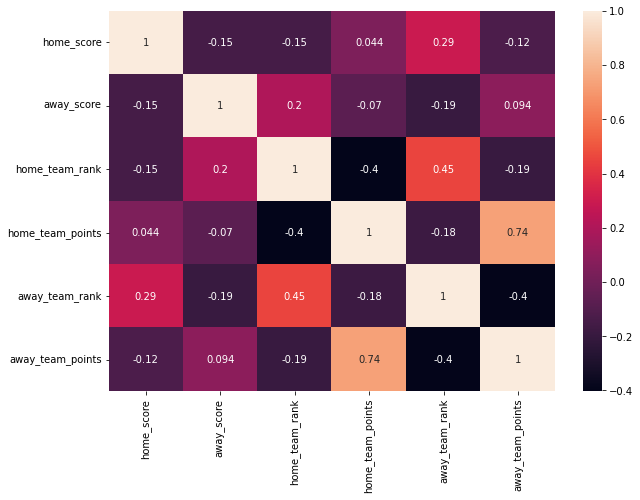

In [31]:
# checking for correlation in the dataset
plt.subplots(figsize=(10,7))
sns.heatmap(merged.corr(method='pearson'), annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feaa1c5a910>,
      dtype=object)

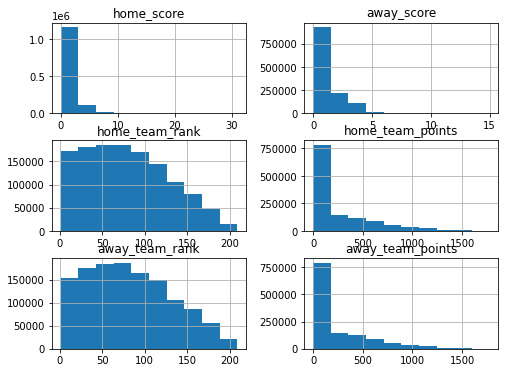

In [32]:
#confirming data distribution
merged.hist(bins=10, figsize=[8,6])

## Feature Engineering

In [33]:
# Creating a new column(score) to determine a win,loss or draw score for the home team
def final_state(score):
  if score['home_score'] > score['away_score']:
    result = 'Win'
  elif score['home_score'] < score['away_score']:
    result = 'Loss'
  else:
    result = 'Draw'
  return result
merged['score'] = merged.apply(final_state, axis=1)
merged.head(1)


,home_team,away_team,home_score,away_score,tournament,home_team_rank,home_team_points,away_team_rank,away_team_points,score
0,Gabon,Burkina Faso,1,1,Friendly,64,0.00000,113,0.00000,Draw


In [34]:
# Converting the tournament columns' data to 3 categories 1,2, and 3
# by creating another column category
def f(tournament_category):
  if tournament_category['tournament'] == 'FIFA World Cup qualification':
    z = 1
  elif tournament_category['tournament'] == 'Friendly':
    z = 2
  else:
    z = 3
  return z

merged['tournament_category'] = merged.apply(f,axis =1)
# dropping tournament column
merged.drop(columns=['tournament']).head(2)

,home_team,away_team,home_score,away_score,home_team_rank,home_team_points,away_team_rank,away_team_points,score,tournament_category
0,Gabon,Burkina Faso,1,1,64,0.00000,113,0.00000,Draw,2
1,Gabon,Burkina Faso,1,1,64,0.00000,119,0.00000,Draw,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


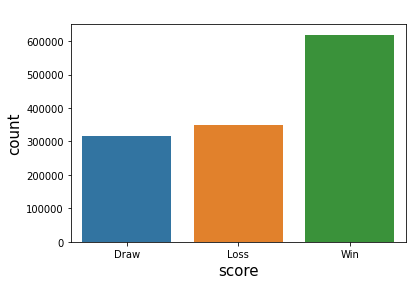

In [35]:
# visualizing new column score on a bar plot
import seaborn as sns
sns.countplot('score',data = merged)
plt.xlabel("score",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("score frequency chart",fontsize=16,color="white")
plt.show()

# it shows a high probabilty to win a match

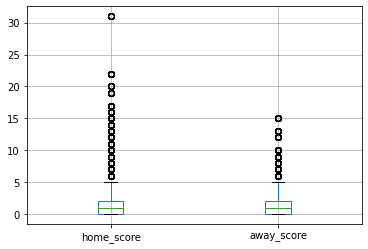

In [36]:
# performing an EDA on home and away scores by checking for outliers

merged.boxplot(column=['home_score','away_score'])

# From the boxplots,both the home score and away score columns have outliers.
## The outliers will not be dropped, since the scores really did occur as shown below
# https://en.m.wikipedia.org/wiki/Australia_31%E2%80%930_American_Samoa and could occur again

# Checking for Multi-collinearity

In [37]:
# single out the needed columns for creating our correlation matrix
merged = merged[['home_team','away_team','home_score','away_score','home_team_rank','away_team_rank','tournament_category']]
merged.head()

,home_team,away_team,home_score,away_score,home_team_rank,away_team_rank,tournament_category
0,Gabon,Burkina Faso,1,1,64,113,2
1,Gabon,Burkina Faso,1,1,64,119,2
2,Gabon,Burkina Faso,1,1,64,123,2
4,Gabon,Burkina Faso,1,1,64,127,2
5,Gabon,Burkina Faso,1,1,51,113,2


In [38]:
# Multicollinearity refers to a situation in which two or more predictor variables
# in a multiple regression model are highly linearly related. 
# We have perfect multicollinearity if the correlation between two independent variables is equal to 1 or −1

# checking for correlation while dropping home_score as it is the target variable
corr = merged.drop(columns=['home_score']).corr()
corr

,away_score,home_team_rank,away_team_rank,tournament_category
away_score,1.00000,0.20157,-0.18949,0.00010
home_team_rank,0.20157,1.00000,0.45279,0.07395
away_team_rank,-0.18949,0.45279,1.00000,0.09379
tournament_category,0.00010,0.07395,0.09379,1.00000



The table above shows how each predictor variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. The correlations have been used to compute the VIF (Variance Inflation Factor) score for each variable.The VIF is created by finding the inverse matrix of the correations matrix.

In [39]:
# creating a VIF dataframe by finding inverse matrrix of the correlation matrix
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
vif

,away_score,home_team_rank,away_team_rank,tournament_category
away_score,1.16256,-0.41993,0.41115,-0.00762
home_team_rank,-0.41993,1.41116,-0.71503,-0.03726
away_team_rank,0.41115,-0.71503,1.40911,-0.07932
tournament_category,-0.00762,-0.03726,-0.07932,1.01019


VIFs start at 1 and have no upper limit. A value of 1 indicates that there is no correlation between this independent variable and any others. VIFs between 1 and 5 suggest that there is a moderate correlation, but it is not severe enough to warrant corrective measures. VIFs greater than 5 represent critical levels of multicollinearity where the coefficients are poorly estimated, and the p-values are questionable.

Since there's no VIF > 5, it means there's no multicollinearity exhibited.

In [40]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283409 entries, 0 to 2325959
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   home_team            1283409 non-null  object
 1   away_team            1283409 non-null  object
 2   home_score           1283409 non-null  int64 
 3   away_score           1283409 non-null  int64 
 4   home_team_rank       1283409 non-null  int64 
 5   away_team_rank       1283409 non-null  int64 
 6   tournament_category  1283409 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 78.3+ MB


##Creating our model using polynomial regression

In [43]:
# Import libaries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


### 1) Predicting the home score(Model 1)

In [44]:
# defining x and y datasets

x = merged[['home_team','away_team','away_score','home_team_rank','away_team_rank','tournament_category']]
y = merged['home_score']

# Encoding categorical variables
x = pd.get_dummies(x, drop_first=True)

# splitting data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


# Standardising the x_train and the x_test to the same scale
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Fitting the polynomial features to the x_train and x_test
poly_features = PolynomialFeatures(degree = 1)
x_train = poly_features.fit_transform(x_train)
x_test = poly_features.fit_transform(x_test)

# Training the model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Making predictions
y_pred = regressor.predict(x_test)

# Measuring the accuracy of the model
pd.options.display.float_format = '{:.5f}'.format
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))

The RMSE score for the model :  1.281780028079683


Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. RMSE value ≥0.5 reflects the poor ability of the model to accurately predict the data.

This means our model has low accuracy for predicting the data.

### 1.1) Checking how appropriate model 1 is using a residual plot

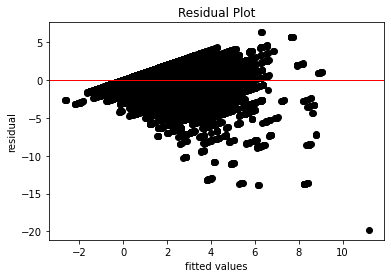

In [45]:
# Plotting the residual plot by substracting the test value from the predicted value

residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

### 2) Predicting the away score(Model 2)

In [49]:
# defining x and y datasets

x = merged[['home_team','away_team','home_score','home_team_rank','away_team_rank','tournament_category']]
y = merged['home_score']

# Encoding categorical variables
x = pd.get_dummies(x, drop_first=True)

# splitting data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


# Standardising the x_train and the x_test to the same scale
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Fitting the polynomial features to the x_train and x_test
poly_features = PolynomialFeatures(degree = 1)
x_train = poly_features.fit_transform(x_train)
x_test = poly_features.fit_transform(x_test)

# Training the model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Making predictions
y_pred = regressor.predict(x_test)

# Measuring the accuracy of the model
pd.options.display.float_format = '{:.5f}'.format
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))

The RMSE score for the model :  1.0519747125839938


 ### 2.1) Checking how appropriate model 2 is using a residual plot

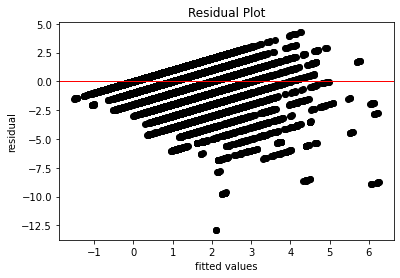

In [50]:
# Plotting the residual plot by substracting the test value from the predicted value

residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()